In [1]:
import pandas as pd

list = []
df = pd.read_csv('FMEL_Dataset.csv')
colums = df.columns
#print(colums)
localGoals = df.localGoals
visitorGoals = df.visitorGoals
concat_goals = pd.concat([localGoals, visitorGoals], axis=1,join_axes=[localGoals.index])
#print(concat_goals)
concat_goals= concat_goals.values
print(len(concat_goals),concat_goals[0][1])

37147 1


In [2]:
import numpy as np
#左のチームの主観
def distinct(goals):
    match_result = []
    win = 2
    lose = 0
    draw = 1
    #print(goals)
    for a in goals:
        result = a[0] - a[1]
        if result > 0:
            match_result.append(win)
        elif result == 0:
            match_result.append(draw)
        elif result < 0:
            match_result.append(lose)
    return match_result

match_result = distinct(concat_goals)
#リストか配列か
#print(len(distinct(concat_goals)),np.array(match_result))
#

In [3]:
#チーム名のembetting
from sklearn.feature_extraction.text import CountVectorizer
local_team = df.localTeam.values
visiter_team = df.localTeam.values
count = CountVectorizer()
bag_local = count.fit_transform(local_team)
bag_visiter = count.fit_transform(visiter_team)

embetting_name_local = bag_local.toarray()
embetting_name_visiter = bag_visiter.toarray()
#embetting_name= embetting_name.tolist()
print(len(embetting_name_local[0]))

121


In [4]:
#正規化に問題ありそう
list = __builtins__.list
def zscore(x):
    xmean = x.mean()
    xstd = np.std(x)
    zscore = (x-xmean)/xstd
    return zscore

#min_maxがダメな気が
def min_max(x):
    min = x.min()
    max = x.max()
    result = (x-min)/(max-min)
    return result

def normalize(v, axis=-1, order=2):
    l2 = np.linalg.norm(v, ord = order, axis=axis, keepdims=True)
    l2[l2==0] = 1
    return v/l2

In [5]:
df_round = df['round'].values
print(df_round[100])
timestamp = df['timestamp'].values
print(timestamp[0])
division = df['division'].values
print(division[0])

13
21938400
1


In [6]:
df_season = df.season.values.tolist()
head = [a[:2] for a in df_season]
#print(head[0])
season = [a.split('-') for a in df_season]
#print(season[0][1])

for i in range(len(season)):
    season[i][1] = head[i] + season[i][1]

for i in range(len(season)):
    season[i] = [int(d) for d in season[i]]
season = np.array(season)
print(season[1])

[1970 1971]


In [7]:
#date
df_date = df['date'].values

#df_date = list(map(lambda d : d.split('/'),df_date))
#df_date = [d.strip('0') for d in df_date]
df_date = [d.split('/') for d in df_date]

for i in range(len(df_date)):
    df_date[i] = [int(d) for d in df_date[i]]
df_date = np.array(df_date)
print(df_date.shape)
print(df_date[0])

(37147, 3)
[  12    9 1970]


In [8]:
df_date = pd.to_datetime(df['date'])
print(df_date[0])
dayofweek = df_date.dt.dayofweek
dayofweek = dayofweek.astype(np.float32)
dayofweek = np.array(dayofweek)
#dayofweek = dayofweek.tolist()
dayofweek = normalize(dayofweek)
dayofweek = dayofweek.reshape(-1, 1)
print(dayofweek)
#print(dayofweek[0][0],dayofweek.shape,dayofweek.dtype)

1970-12-09 00:00:00
[[0.00211121]
 [0.00211121]
 [0.00211121]
 ...
 [0.00105561]
 [0.00105561]
 [0.00105561]]


In [80]:
new_df = np.zeros((37147,243))

for i in range(len(df_date)):
    new_df[i] =  np.hstack((
        #season[i],
        #division[i],
        df_round[i],
        embetting_name_local[i],
        embetting_name_visiter[i]
        #dayofweek[i]
        
    ))
    
print(new_df[0])
print(type(new_df))

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0.]
<class 'numpy.ndarray'>


In [64]:
first_half = normalize(new_df[:,0])
first_half = first_half.reshape(-1,1)
second_half = normalize(new_df[:,1])
second_half = second_half.reshape(-1,1)
new_df = np.delete(new_df,0,1)
new_df = np.delete(new_df,0,1)


In [65]:
full_year = np.hstack((first_half,second_half))
print(full_year.shape)

new_df = np.hstack((full_year,new_df))
print(new_df[100])

(37147, 2)
[0.00295268 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         1.
 0.         0.         0.         0.         

In [66]:
new_df = new_df.astype(np.float32)
print(new_df)

[[0.00022713 0.         0.         ... 0.         0.         0.        ]
 [0.00022713 0.         0.         ... 0.         0.         0.        ]
 [0.00022713 0.         0.         ... 0.         0.         0.        ]
 ...
 [0.00953942 0.         0.         ... 0.         0.         0.        ]
 [0.00953942 0.         0.         ... 0.         0.         0.        ]
 [0.00953942 0.         0.         ... 0.         0.         0.        ]]


In [67]:
#試合結果
match_result = np.array(match_result)
print(match_result.shape)

(37147,)


In [68]:
datasets = []
for i,j in zip(new_df,match_result):
    datasets.append((i,j))
print(datasets[0])

(array([2.2712906e-04, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000

In [69]:
#ここからモデル作り
train_number = int(len(datasets) * 0.6)
print(train_number)
train_and_valid = int(len(datasets) * 0.8)
test_number = int(len(datasets) * 0.2)
train_valid_datasets = datasets[0:train_and_valid]
train = train_valid_datasets[0:train_number]
validation = train_valid_datasets[train_number:len(train_valid_datasets)]
test = datasets[train_and_valid:len(datasets)]

22288


Iteratorの作成

Iterator:データセットから決まった数のデータとラベルを取得し、それらを束ねてミニバッチを作成する機能を持ったもの。

SerialIterator:データセットの中のデータを順番に取り出してくるもっともシンプルなIterator

chainはパラメータを持つ層(Link)をまとめておくためのクラス。
モデルのパラメータの更新はOptimizerという機能が担う。
chain.params()で更新されるパラメータ一覧が取得できる。

In [81]:
from chainer import iterators

batchsize = 100

train_iter = iterators.SerialIterator(train, batchsize)
valid_iter = iterators.SerialIterator(
    validation, batchsize, repeat=False, shuffle=False)
test_iter = iterators.SerialIterator(
    test, batchsize, repeat=False, shuffle=False)

In [82]:
import chainer
import chainer.links as L
import chainer.functions as F

class MLP(chainer.Chain):
    def __init__(self, n_out=3):
        super(MLP, self).__init__()
        
        with self.init_scope():
            self.l1 = L.Linear(None, 200)
            self.l2 = L.Linear(None, 100)
            self.l3 = L.Linear(None, n_out)
    
    def __call__(self, x):
        h1 = F.relu(self.l1(x))
        h2 = F.relu(self.l2(h1))
        return self.l3(h2)
    
gpu_id = -1  # CPUを用いる場合は、この値を-1にしてください

#net = MLP()

#if gpu_id >= 0:
 #   net.to_gpu(gpu_id)

In [83]:
from chainer import optimizers, training
from chainer.training import extensions

def  train_and_validate(
        model, optimizer, train, validation, n_epoch, batchsize, device):
    
    # 1. deviceがgpuであれば、gpuにモデルのデータを転送する
    if device >= 0:
        model.to_gpu(device)
        
    # 2. Optimizerを設定する
    optimizer.setup(model)
    
    # 3. DatasetからIteratorを作成する
    train_iter = chainer.iterators.SerialIterator(train, batchsize)
    validation_iter = chainer.iterators.SerialIterator(
        validation, batchsize, repeat=False, shuffle=False)
    
    # 4. Updater・Trainerを作成する
    updater = training.StandardUpdater(train_iter, optimizer, device=device)
    trainer = chainer.training.Trainer(updater, (n_epoch, 'epoch'), out='out')
    
    # 5. Trainerの機能を拡張する
    trainer.extend(extensions.LogReport())
    trainer.extend(extensions.Evaluator(validation_iter, model, device=device), name='val')
    trainer.extend(extensions.PrintReport(
        ['epoch', 'main/loss', 'main/accuracy', 'val/main/loss', 'val/main/accuracy', 'elapsed_time']))
    trainer.extend(extensions.PlotReport(
        ['main/loss', 'val/main/loss'],x_key='epoch', file_name='loss.png'))
    trainer.extend(extensions.PlotReport(
        ['main/accuracy', 'val/main/accuracy'], x_key='epoch', file_name='accuracy.png'))
    trainer.extend(extensions.dump_graph('main/loss'))
    
    # 6. 訓練を開始する
    trainer.run()

In [88]:
device = -1  # specify gpu id. if device == -1, use cpu
n_epoch = 20  # Only 5 epochs
batchsize = 100

model = MLP() 
classifier_model = L.Classifier(model)
optimizer = optimizers.Adam()

In [89]:
train_and_validate(
    classifier_model, optimizer, train, validation, n_epoch, batchsize, device)

epoch       main/loss   main/accuracy  val/main/loss  val/main/accuracy  elapsed_time
1           1.00073     0.535561       1.09284        0.447117           1.23271       
2           0.994339    0.536054       1.08376        0.447117           2.93626       
3           0.993207    0.535561       1.08852        0.447117           4.32088       
4           0.992457    0.536413       1.08611        0.443724           5.90419       
5           0.991628    0.536413       1.08728        0.443724           7.81762       
6           0.991419    0.537354       1.09119        0.443057           9.5116        
7           0.99137     0.536951       1.09255        0.443057           11.2733       
8           0.99096     0.53704        1.08899        0.442657           12.8821       
9           0.990519    0.537432       1.09283        0.443057           14.6756       
10          0.990695    0.537399       1.09276        0.443057           16.3808       
11          0.990585    0.537265  

In [90]:
import pydot
from IPython.display import Image, display

def show_graph():
    graph = pydot.graph_from_dot_file('out/cg.dot') # load from .dot file
    graph[0].write_png('graph.png')
    display(Image('graph.png', width=600, height=600))

In [91]:
def show_loss_and_accuracy():
    display(Image(filename='out/loss.png'))
    display(Image(filename='out/accuracy.png'))

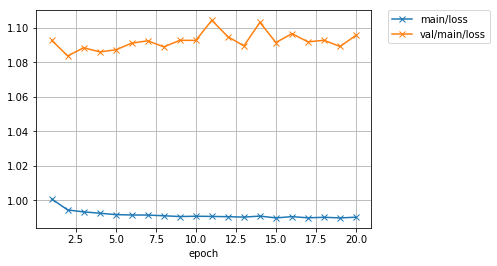

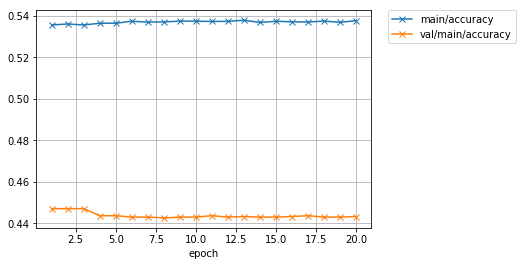

In [92]:
show_loss_and_accuracy()